<a href="https://colab.research.google.com/github/josejulianhidayat/Clustering_dan_Klasifikasi-marketing_campaign/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Jose_Julian_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
import pandas as pd

# Langkah 1: Memuat Dataset
file_path = 'marketing_campaign.csv'  # Pastikan file berada di lokasi yang sesuai
data = pd.read_csv(file_path, sep='\t')  # Pastikan delimiter sesuai

# Langkah 2: Menampilkan Informasi Dataset
print("Informasi Dataset:")
data.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import pustaka yang dibutuhkan
import pandas as pd  # Untuk analisis data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi yang lebih baik

# Konfigurasi untuk menampilkan grafik secara langsung
%matplotlib inline


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Path dataset
file_path = 'marketing_campaign.csv'

# Memuat dataset
data = pd.read_csv(file_path, sep='\t')  # Gunakan delimiter tab '\t'

# Memeriksa beberapa baris awal untuk memastikan dataset dimuat dengan benar
print("Contoh Data Teratas:")
print(data.head())

# Memeriksa informasi dasar dataset
print("\nInformasi Dataset:")
data.info()

# Memeriksa jumlah missing values
print("\nJumlah Missing Values pada Setiap Kolom:")
print(data.isnull().sum())


Contoh Data Teratas:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Compla

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Memahami Struktur Data

Tinjau jumlah baris dan kolom dalam dataset.
Tinjau jenis data di setiap kolom (numerikal atau kategorikal). **bold text**

In [4]:
# Menampilkan jumlah baris dan kolom dalam dataset
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")

# Menampilkan tipe data di setiap kolom
print("\nTipe data setiap kolom:")
print(data.dtypes)


Jumlah baris: 2240
Jumlah kolom: 29

Tipe data setiap kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object



Statistik deskriptif variabel numerik:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min   

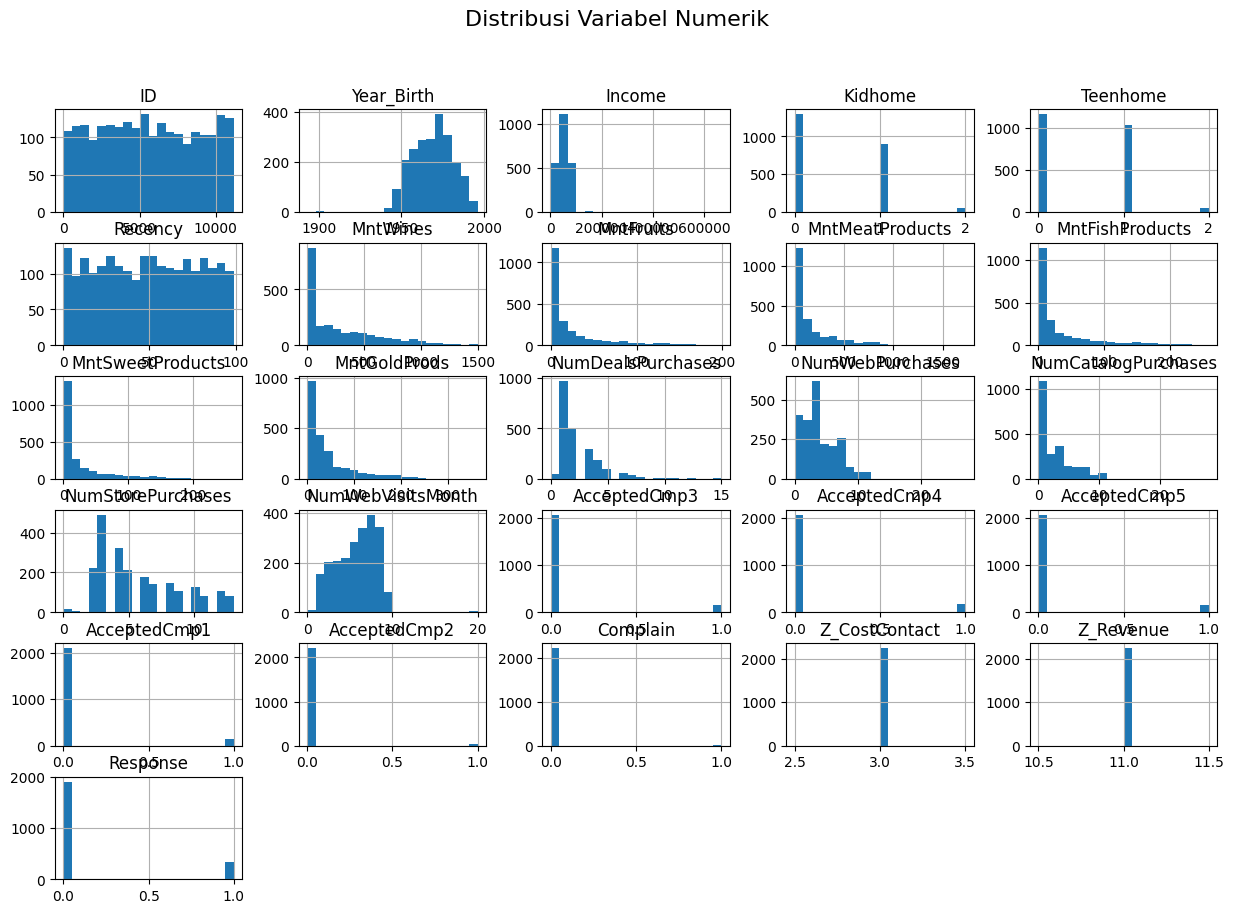

In [5]:
# Distribusi variabel numerik
print("\nStatistik deskriptif variabel numerik:")
print(data.describe())

# Visualisasi distribusi (histogram) untuk kolom numerik
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()




Matriks Korelasi (Numerik Saja):
                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.0

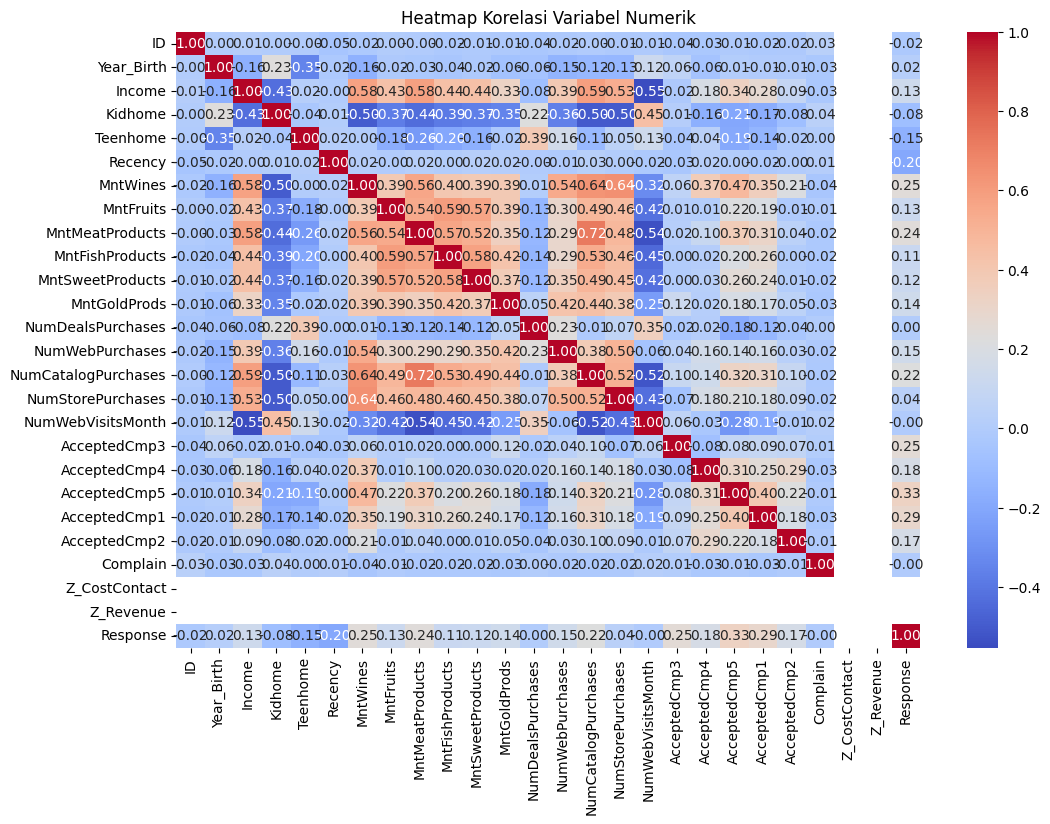

In [6]:
# Pilih hanya kolom numerik
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Matriks korelasi untuk kolom numerik
print("\nMatriks Korelasi (Numerik Saja):")
correlation_matrix = data[numerical_cols].corr()
print(correlation_matrix)

# Heatmap untuk korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


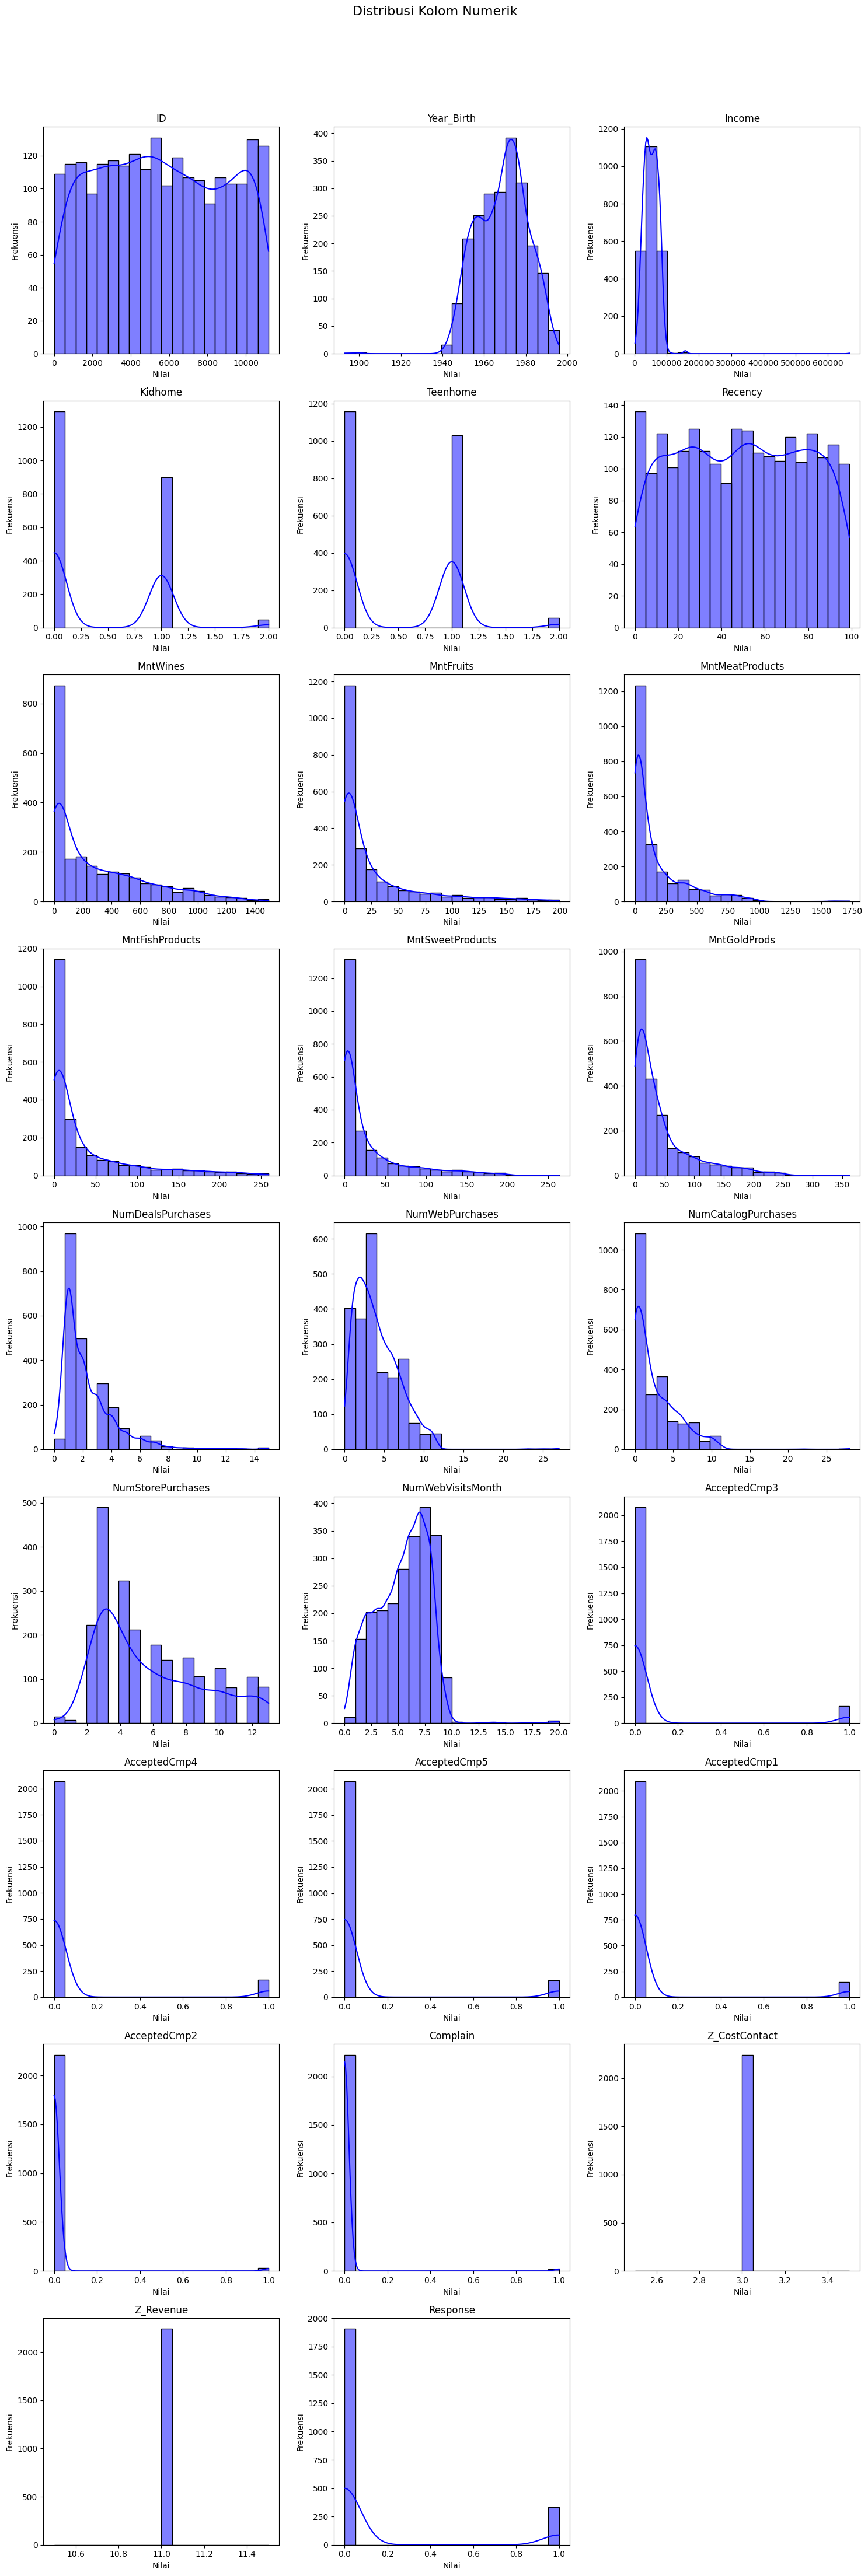

In [7]:
import matplotlib.pyplot as plt

# Visualisasi semua kolom numerik dalam satu lembar (grid plot)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Tentukan jumlah baris dan kolom untuk grid
n_cols = 3  # Jumlah kolom per baris
n_rows = -(-len(numerical_cols) // n_cols)  # Hitung jumlah baris (ceil)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle("Distribusi Kolom Numerik", fontsize=16)

# Loop untuk plot histogram setiap kolom
for i, col in enumerate(numerical_cols):
    row, col_index = divmod(i, n_cols)
    ax = axes[row, col_index]
    sns.histplot(data[col], kde=True, bins=20, color='blue', ax=ax)
    ax.set_title(f"{col}", fontsize=12)
    ax.set_xlabel("Nilai", fontsize=10)
    ax.set_ylabel("Frekuensi", fontsize=10)

# Hapus subplot kosong (jika ada)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Tambahkan ruang untuk judul
plt.show()


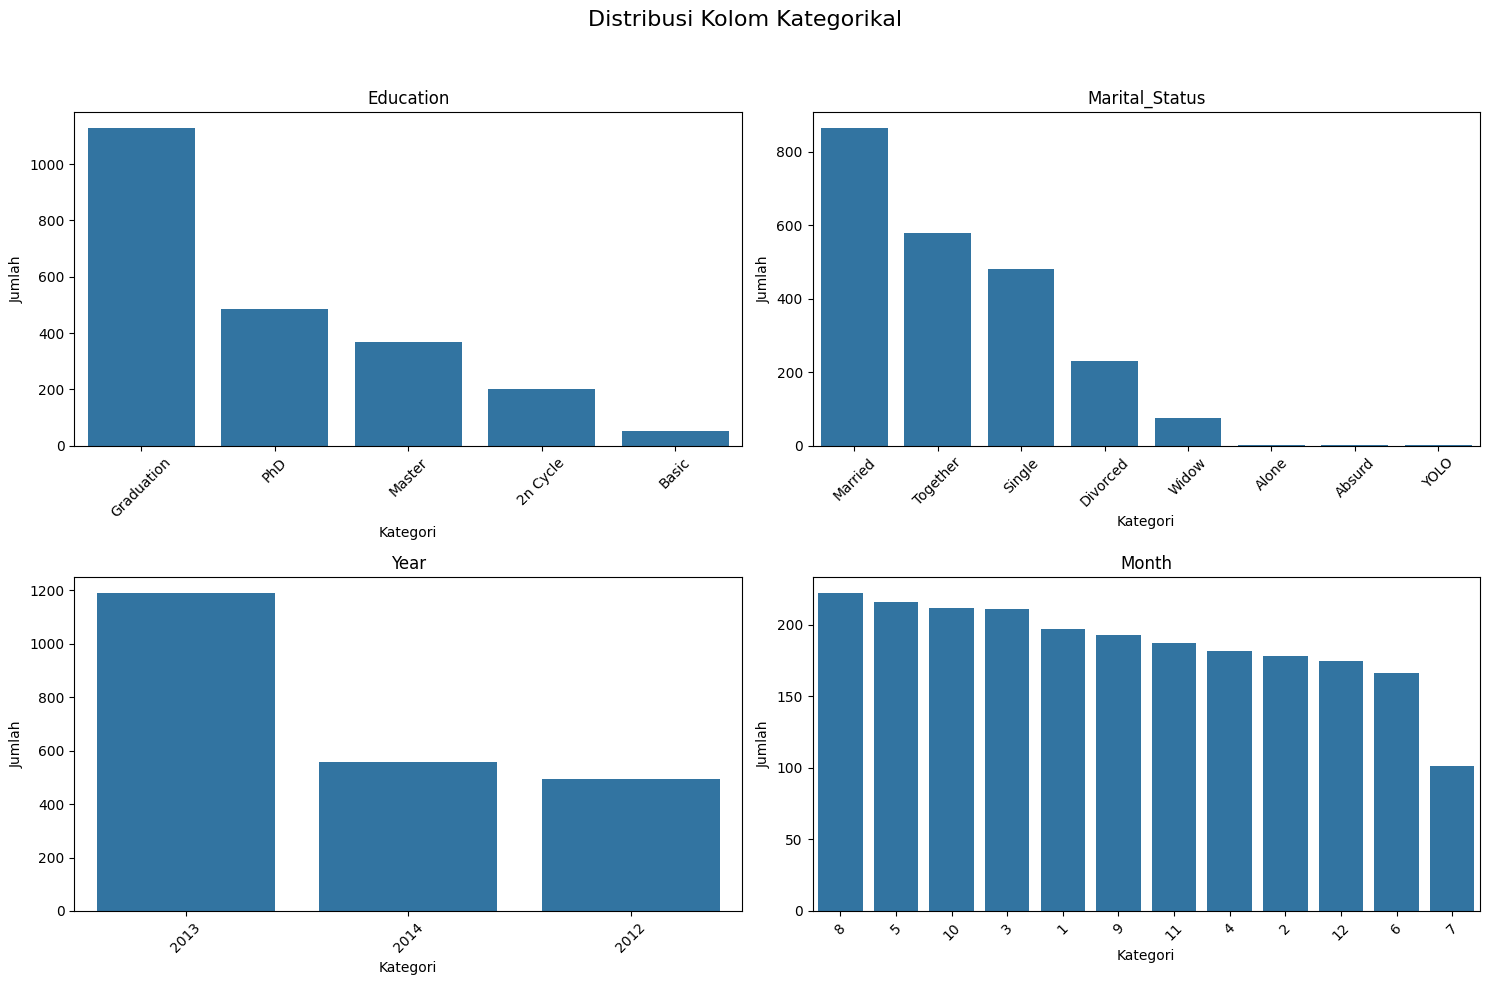

In [8]:
# Format 'Dt_Customer' dengan parameter dayfirst=True
if 'Dt_Customer' in data.columns:
    data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)  # Mengatasi format DD-MM-YYYY
    # Tambahkan kolom tahun dan bulan
    data['Year'] = data['Dt_Customer'].dt.year
    data['Month'] = data['Dt_Customer'].dt.month

# Hilangkan 'Dt_Customer' dari daftar kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Dt_Customer']

# Tambahkan kolom agregasi ke dalam visualisasi
categorical_cols = list(categorical_cols) + ['Year', 'Month']

# Tentukan jumlah baris dan kolom untuk grid
n_cols = 2  # Jumlah kolom per baris
n_rows = -(-len(categorical_cols) // n_cols)  # Hitung jumlah baris (ceil)

# Buat subplot untuk semua kolom kategorikal
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle("Distribusi Kolom Kategorikal", fontsize=16)

for i, col in enumerate(categorical_cols):
    row, col_index = divmod(i, n_cols)
    ax = axes[row, col_index]
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=ax)
    ax.set_title(f"{col}", fontsize=12)
    ax.set_xlabel("Kategori", fontsize=10)
    ax.set_ylabel("Jumlah", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Hapus subplot kosong (jika ada)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Atur tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [9]:
# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values:")
print(data.isnull().sum())

# Mengisi nilai kosong dengan median (untuk kolom numerik)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Mengisi nilai kosong dengan modus (untuk kolom kategorikal)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verifikasi
print("\nJumlah Missing Values Setelah Penanganan:")
print(data.isnull().sum())


Jumlah Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Year                    0
Month                   0
dtype: int64

Jumlah Missing Values Setelah Penanganan:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income         

In [10]:
# Mengecek jumlah baris duplikat
print(f"Jumlah Baris Duplikat Sebelum: {data.duplicated().sum()}")

# Menghapus baris duplikat
data = data.drop_duplicates()

# Verifikasi
print(f"Jumlah Baris Duplikat Setelah: {data.duplicated().sum()}")


Jumlah Baris Duplikat Sebelum: 0
Jumlah Baris Duplikat Setelah: 0


In [11]:
from sklearn.preprocessing import StandardScaler

# Normalisasi kolom numerik
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verifikasi
print("\nData Setelah Normalisasi:")
print(data[numerical_cols].head())



Data Setelah Normalisasi:
         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.235696 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.235454  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.773999 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.022355  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.241888  1.032559 -0.929894  1.550305 -0.389085   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0   1.551577         1.679702         2.462147  ...           0.693904   
1  -0.636301        -0.713225        -0.650449  ...          -0.130463   
2   0.570804        -0.177032         1.345274  ...          -0.542647   
3  -0.560857        -0.651187        -0.503974  ...           0.281720   
4   0.419916        -0.216914         0.155164  ...          -0.130463   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  Accept

In [12]:
import numpy as np

# Menghapus outlier menggunakan metode IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghapus outlier
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Verifikasi
print("\nData Setelah Menghapus Outlier:")
print(data[numerical_cols].describe())



Data Setelah Menghapus Outlier:
               ID  Year_Birth      Income     Kidhome    Teenhome     Recency  \
count  838.000000  838.000000  838.000000  838.000000  838.000000  838.000000   
mean     0.006402    0.180146   -0.687629    0.629080   -0.024632    0.070692   
std      1.002394    0.921248    0.483686    0.944783    0.970084    0.994426   
min     -1.720045   -2.404211   -1.787205   -0.825218   -0.929894   -1.696001   
25%     -0.860509   -0.484568   -1.041431   -0.825218   -0.929894   -0.798086   
50%     -0.046415    0.266596   -0.705965    1.032559   -0.929894    0.065293   
75%      0.868652    0.829970   -0.349986    1.032559    0.906934    0.963208   
max      1.724876    2.186239    0.675167    2.890335    2.743762    1.722981   

         MntWines   MntFruits  MntMeatProducts  MntFishProducts  ...  \
count  838.000000  838.000000       838.000000       838.000000  ...   
mean    -0.780634   -0.554195        -0.647009        -0.577037  ...   
std      0.161650    

In [13]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding untuk kolom kategorikal
encoded_data = pd.get_dummies(data[categorical_cols], drop_first=True)

# Gabungkan kembali ke dataset
data = pd.concat([data, encoded_data], axis=1)
data = data.drop(columns=categorical_cols)

# Verifikasi
print("\nData Setelah Encoding:")
print(data.head())



Data Setelah Encoding:
          ID  Year_Birth    Income   Kidhome  Teenhome Dt_Customer   Recency  \
1  -1.053058   -1.235733 -0.235454  1.032559  0.906934  2014-03-08 -0.383664   
3   0.181716    1.268149 -1.022355  1.032559 -0.929894  2014-02-10 -0.798086   
7   0.180176    1.351612 -0.750388  1.032559 -0.929894  2013-05-08 -0.590875   
10 -1.108512    1.184687 -0.034215  1.032559 -0.929894  2013-11-15 -1.316114   
11 -1.603592    0.600447 -1.787205 -0.825218 -0.929894  2012-11-13  0.341574   

    MntWines  MntFruits  MntMeatProducts  ...  Month  Education_Basic  \
1  -0.870479  -0.636301        -0.713225  ...      3            False   
3  -0.870479  -0.560857        -0.651187  ...      2            False   
7  -0.677327  -0.409969        -0.491658  ...      5            False   
10 -0.888309  -0.535709        -0.713225  ...     11            False   
11 -0.885337  -0.259081        -0.691069  ...     11             True   

    Education_Graduation  Education_Master  Education_Ph

In [14]:
# Contoh binning untuk kolom numerik (misalnya Age)
if 'Age' in data.columns:
    bins = [0, 20, 40, 60, 80, np.inf]
    labels = ['<20', '20-40', '40-60', '60-80', '>80']
    data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Verifikasi
if 'Age_Group' in data.columns:
    print("\nDistribusi Age_Group:")
    print(data['Age_Group'].value_counts())


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

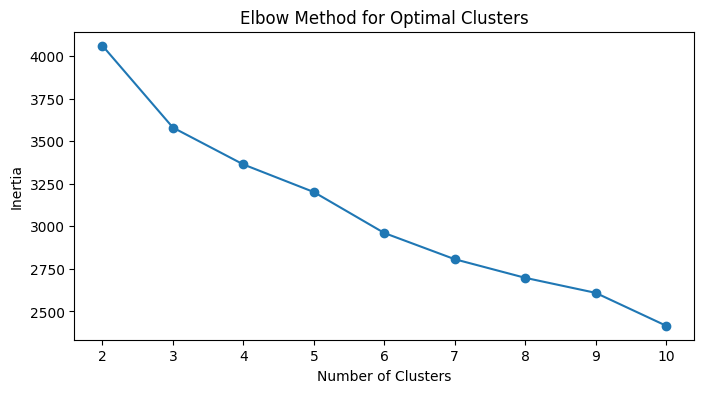

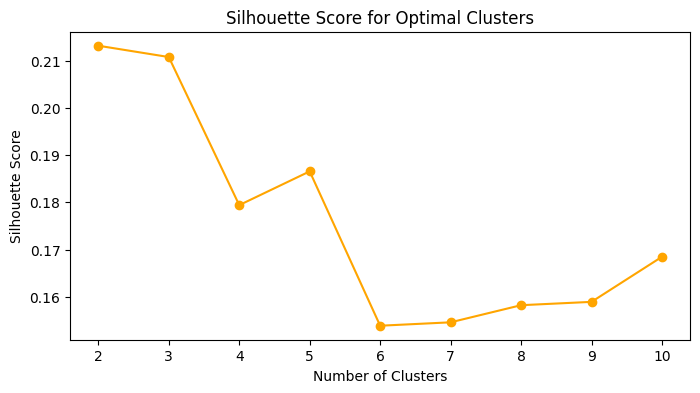


Distribusi Data dalam Setiap Cluster:
Cluster
1    393
0    268
2    177
Name: count, dtype: int64


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data untuk clustering (hanya kolom numerik)
clustering_data = data.select_dtypes(include=['float64', 'int64'])

# Tentukan jumlah cluster optimal menggunakan metode Elbow
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, kmeans.labels_))

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Pilih jumlah cluster berdasarkan hasil Elbow dan Silhouette Score
optimal_clusters = 3  # Misalnya dari hasil visualisasi
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(clustering_data)

# Tambahkan hasil clustering ke dataset
data['Cluster'] = kmeans.labels_

# Tampilkan distribusi cluster
print("\nDistribusi Data dalam Setiap Cluster:")
print(data['Cluster'].value_counts())


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

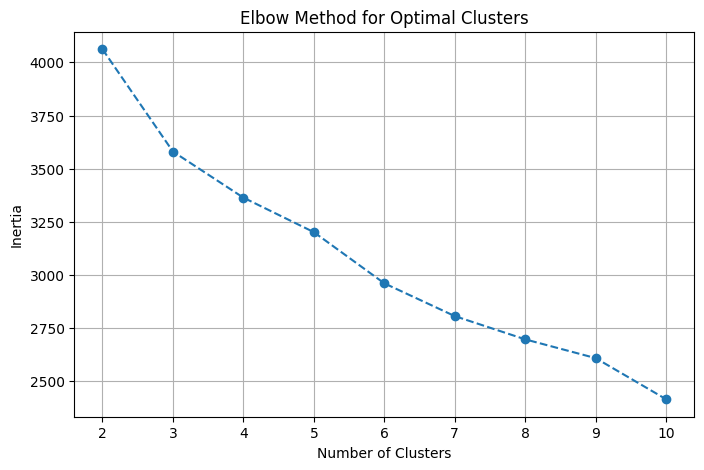

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data untuk clustering (hanya kolom numerik)
clustering_data = data.select_dtypes(include=['float64', 'int64'])

# Inisialisasi daftar inertia
inertia = []
cluster_range = range(2, 11)  # Jumlah cluster dari 2 hingga 10

# Latih model untuk setiap jumlah cluster
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


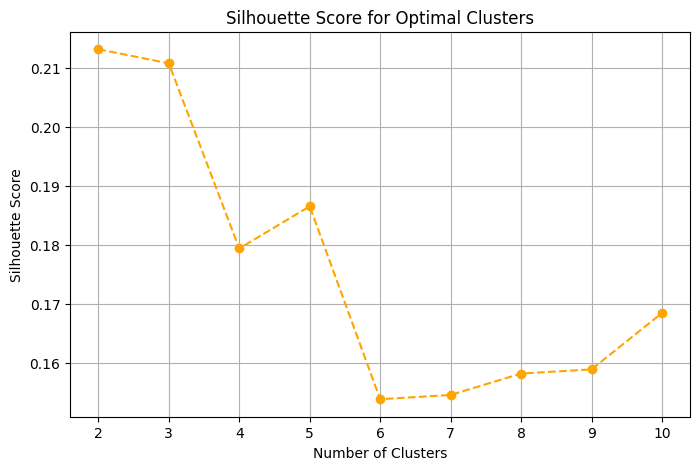

In [17]:
from sklearn.metrics import silhouette_score

# Inisialisasi daftar silhouette score
silhouette_scores = []

# Hitung silhouette score untuk setiap jumlah cluster
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data)
    score = silhouette_score(clustering_data, kmeans.labels_)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title("Silhouette Score for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pastikan data memiliki label hasil clustering
if 'Cluster' in data.columns:
    X = clustering_data  # Data tanpa kolom 'Cluster'
    y = data['Cluster']  # Label hasil clustering

    # Seleksi fitur terbaik berdasarkan ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
    X_new = selector.fit_transform(X, y)

    # Menampilkan fitur yang dipilih
    selected_features = X.columns[selector.get_support()]
    print("Fitur Terpilih:")
    print(selected_features)
else:
    print("Kolom 'Cluster' belum tersedia. Lakukan clustering terlebih dahulu.")


Fitur Terpilih:
Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

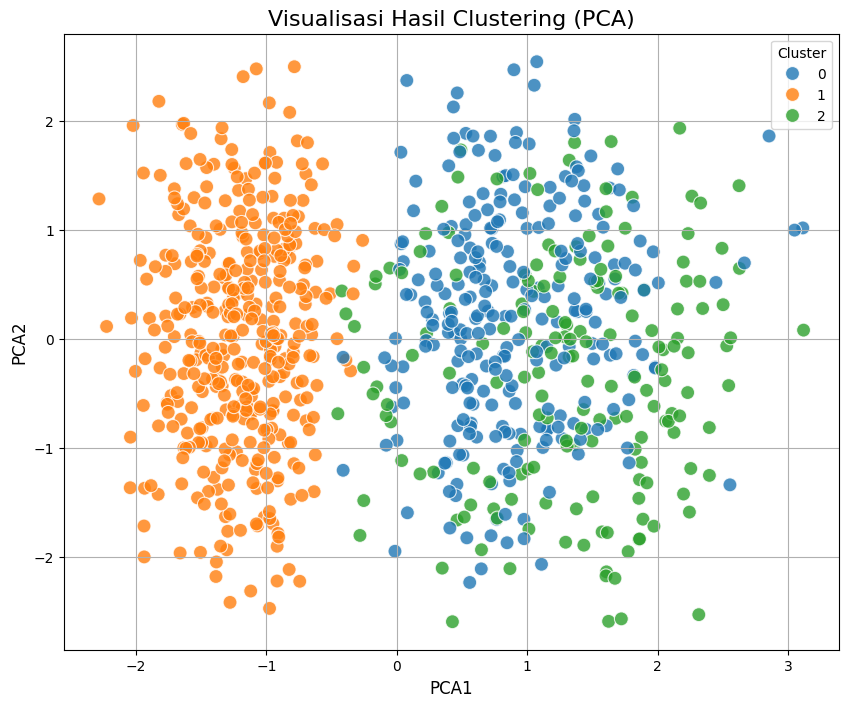

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduksi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(clustering_data)

# Tambahkan hasil PCA ke dataset
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100, alpha=0.8)
plt.title("Visualisasi Hasil Clustering (PCA)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Rata-Rata Fitur dalam Setiap Cluster:
               ID  Year_Birth    Income   Kidhome  Teenhome  \
Cluster                                                       
0        0.017749   -0.328231 -0.491319  1.198927  0.975472   
1        0.006505    0.869524 -0.918478  0.895471 -0.929894   
2       -0.011008   -0.580763 -0.472302 -0.825218  0.471076   

                          Dt_Customer   Recency  MntWines  MntFruits  \
Cluster                                                                
0       2013-08-25 20:35:49.253731328  0.108849 -0.772052  -0.595952   
1       2013-08-19 13:11:27.022900736  0.077508 -0.835841  -0.532382   
2       2013-08-15 08:08:08.135593216 -0.002216 -0.671048  -0.539403   

         MntMeatProducts  ...  Education_Graduation  Education_Master  \
Cluster                   ...                                           
0              -0.658726  ...              0.481343          0.179104   
1              -0.647973  ...              0.521628          0.129

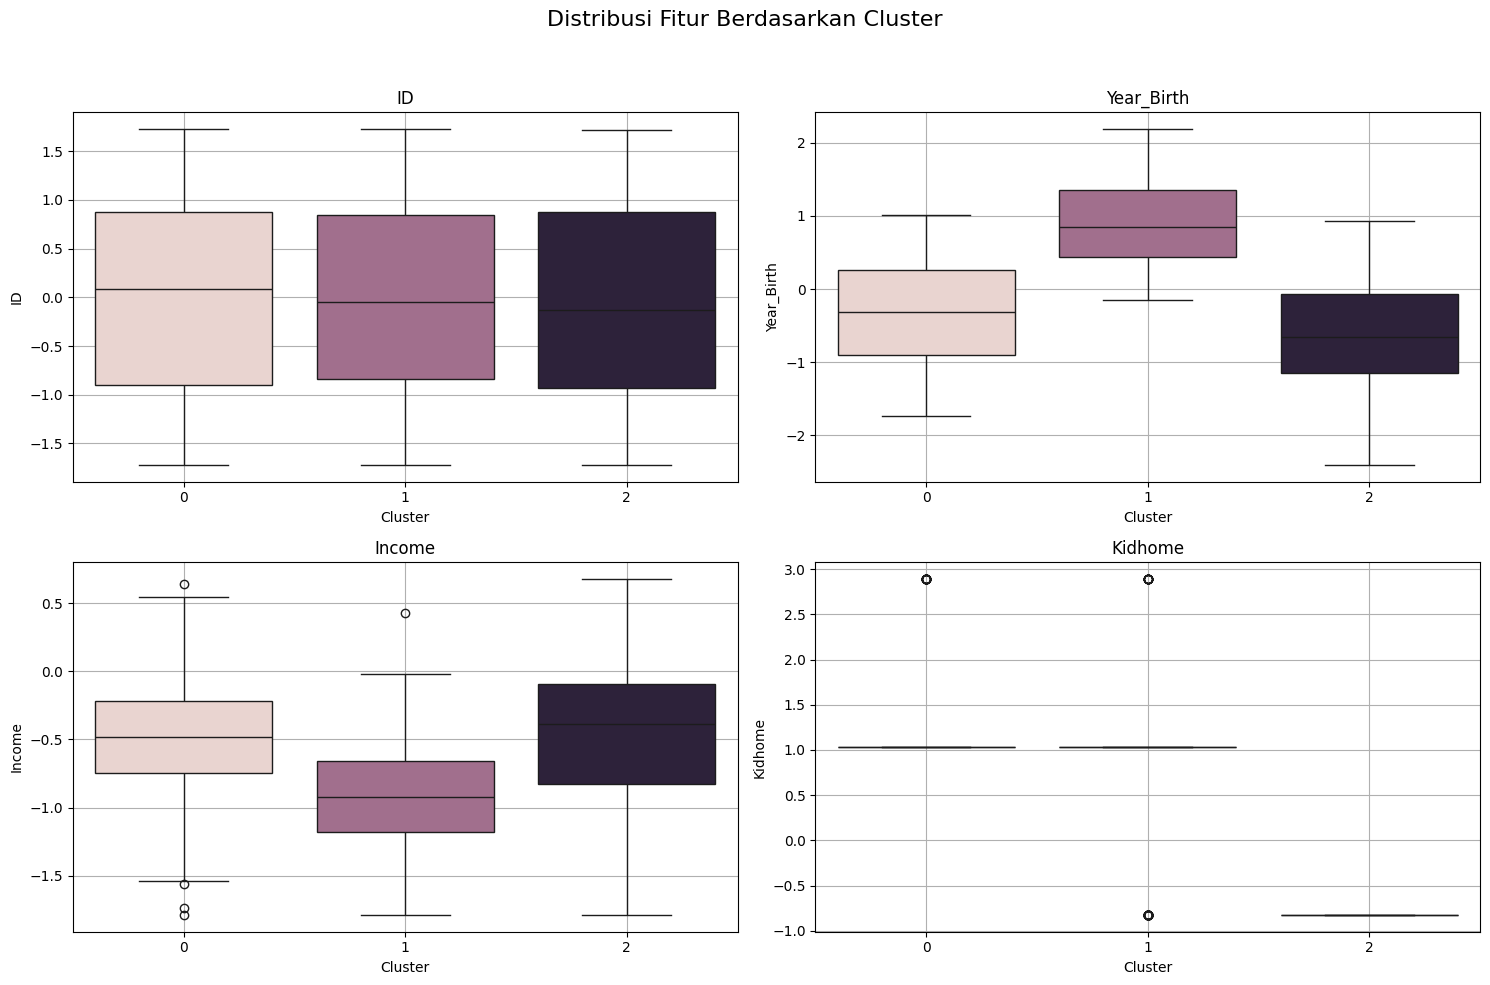

In [23]:
# Analisis rata-rata untuk setiap fitur dalam masing-masing cluster
cluster_analysis = data.groupby('Cluster').mean()

print("Rata-Rata Fitur dalam Setiap Cluster:")
print(cluster_analysis)

# Visualisasi distribusi fitur utama berdasarkan cluster dalam satu lembar
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih beberapa fitur penting untuk divisualisasikan
selected_features = clustering_data.columns[:4]  # Pilih 4 fitur pertama sebagai contoh

# Tentukan jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom per baris
n_rows = -(-len(selected_features) // n_cols)  # Hitung jumlah baris (ceil)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle("Distribusi Fitur Berdasarkan Cluster", fontsize=16)

# Loop untuk membuat boxplot untuk setiap fitur
for i, feature in enumerate(selected_features):
    row, col = divmod(i, n_cols)
    sns.boxplot(data=data, x='Cluster', y=feature, hue='Cluster', ax=axes[row, col], dodge=False)
    axes[row, col].set_title(f"{feature}", fontsize=12)
    axes[row, col].set_xlabel("Cluster", fontsize=10)
    axes[row, col].set_ylabel(feature, fontsize=10)
    axes[row, col].grid(True)
    # Hapus legenda untuk setiap subplot agar lebih bersih
    if axes[row, col].get_legend() is not None:
        axes[row, col].legend_.remove()

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Atur tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Berdasarkan hasil analisis rata-rata fitur dalam setiap cluster, berikut adalah interpretasi mendalam untuk masing-masing cluster:
--------------------------------------------------------------------------------

Cluster 0
------------------------------------------------------------------------------
Karakteristik Utama:

MntWines dan MntFruits: Rata-rata pengeluaran rendah (-0.772052 dan -0.595952).
Marital_Status_Together: Proporsi tinggi (26.49%), menunjukkan banyak pasangan hidup bersama.
PCA1: Nilai tinggi positif (0.900320), menunjukkan pengaruh yang signifikan pada dimensi pertama PCA.
Interpretasi:

Cluster ini dapat mewakili pasangan yang hidup bersama dengan tingkat pengeluaran relatif rendah.
Strategi: Berikan penawaran khusus untuk produk kebutuhan rumah tangga atau promosi diskon untuk pembelian kecil.

Cluster 1
---------------------------------------------------------------------------
Karakteristik Utama:

MntMeatProducts: Pengeluaran rata-rata terendah di antara semua cluster (-0.647973).
Marital_Status_Married: Proporsi tertinggi (41.98%), menunjukkan mayoritas pasangan menikah.
PCA1: Nilai negatif signifikan (-1.202337), menunjukkan karakteristik yang unik.
Interpretasi:

Cluster ini mungkin mencerminkan pasangan menikah dengan pengeluaran rendah untuk produk tertentu.
Strategi: Fokus pada produk dengan harga terjangkau dan paket keluarga.


Cluster 2
-----------------------------------------------------------------------------
Karakteristik Utama:

MntMeatProducts: Pengeluaran relatif lebih tinggi dibandingkan cluster lain (-0.627127).
Marital_Status_Together: Proporsi tertinggi (28.81%).
PCA1: Nilai tertinggi positif (1.306399).
Interpretasi:

Cluster ini mungkin mencerminkan pasangan yang hidup bersama dengan pengeluaran sedang untuk kebutuhan rumah tangga.
Strategi: Fokus pada produk premium untuk kebutuhan rumah tangga dengan promosi loyalitas.


Kesimpulan Umum
------------------------------------------------------------------------
Cluster 0: Pasangan hidup bersama dengan pengeluaran rendah, cocok untuk promosi diskon.
Cluster 1: Pasangan menikah dengan fokus pada kebutuhan dasar.
Cluster 2: Pasangan dengan pengeluaran sedang dan cenderung memilih produk premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [24]:
# Simpan hasil dataset dengan cluster ke file CSV
output_file = "clustered_data.csv"
data.to_csv(output_file, index=False)

print(f"Data berhasil diekspor ke file '{output_file}'")


Data berhasil diekspor ke file 'clustered_data.csv'
